In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
vg_df = pd.read_csv("Resources/Video_Games.csv")
vg_df

,metascore,name,userscore
0,97,Grand Theft Auto V,83
1,97,Grand Theft Auto V,83
2,95,The Last of Us,92
3,94,BioShock Infinite,85
4,94,BioShock Infinite,86
...,...,...,...
14269,38,Touhou Kobuto V: Burst Battle,46
14270,38,Randall,21
14271,36,Tokyo Tattoo Girls,54
14272,26,Road Rage,25


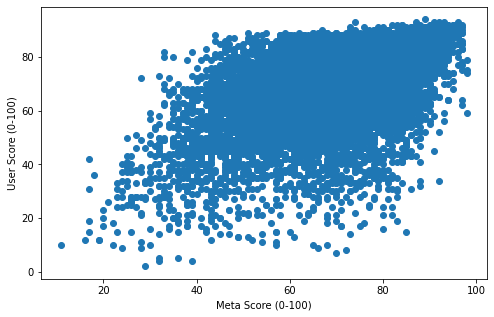

In [3]:
plt.figure(figsize=(8,5))
x_data, y_data = (vg_df["metascore"].values, vg_df["userscore"].values)
plt.scatter(x_data, y_data)
plt.xlabel('Meta Score (0-100)')
plt.ylabel('User Score (0-100)')
plt.show()


C:\Users\cpmor\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


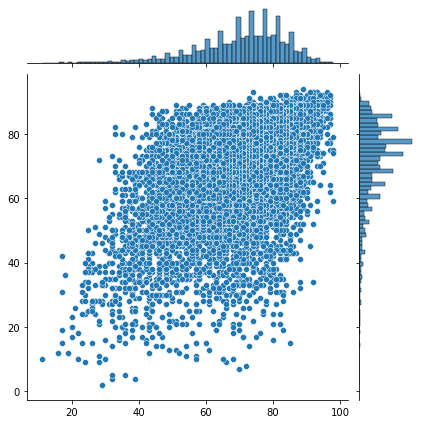

In [4]:
sns.jointplot(x_data, y_data)

C:\Users\cpmor\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


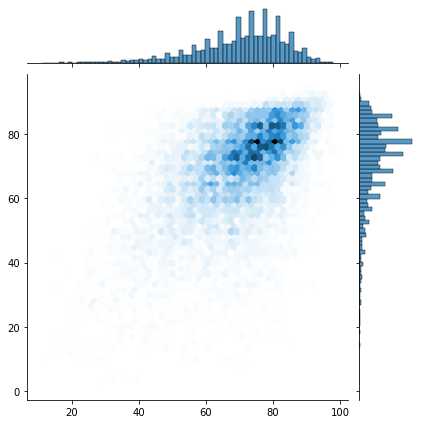

In [5]:
sns.jointplot(x_data, y_data, kind='hex')

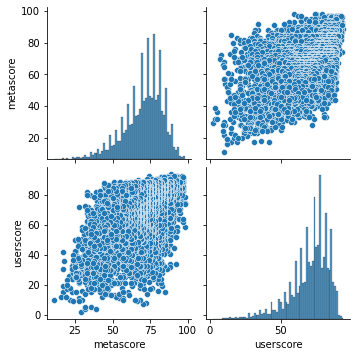

In [6]:
sns.pairplot(vg_df)

In [7]:
X = vg_df.metascore.values.reshape(-1,1)

In [8]:
X.shape

(14274, 1)

(14274,)


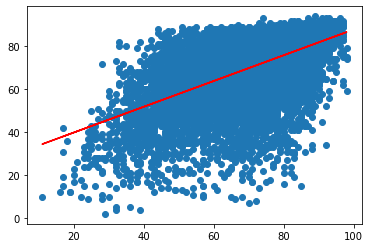

[0.59943999]
27.871851787867392


In [9]:
y = vg_df.userscore
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.show()

print(model.coef_)
print(model.intercept_)

In [10]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[11]]
Max X Value: [[98]]


In [11]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

[0.59943999]
27.871851787867392


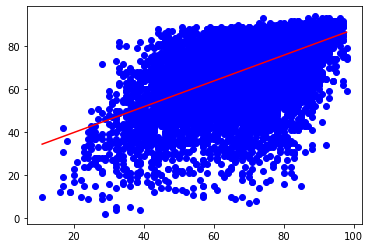

In [12]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
print(model.coef_)
print(model.intercept_)

In [13]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
print('Coefficients: \n', model.coef_)
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))
print('Variance score" %.2f' % testing_score)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Coefficients: 
 [0.59309261]
Mean squared error: 134.81
Variance score" 0.31
Training Score: 0.3080054573472343
Testing Score: 0.3116349375439432


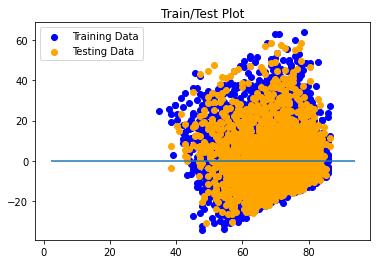

In [15]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='blue', label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='orange', label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Train/Test Plot")
plt.show()

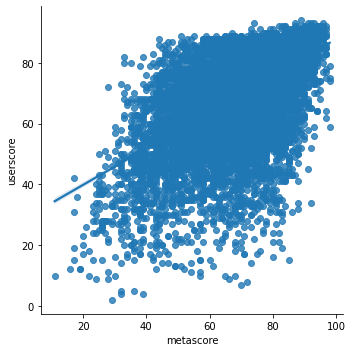

In [16]:
sns.lmplot(x='metascore', y='userscore', data=vg_df)

In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [0.59309261]


Text(0, 0.5, 'Predicted Y')

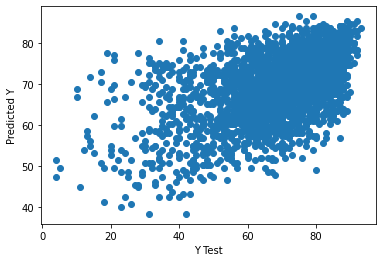

In [18]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')